In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

In [35]:
import itertools

In [36]:
from itertools import chain, combinations
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [37]:
????
for i in range(5):
    for s in 2**5:

IndentationError: expected an indented block (817135422.py, line 2)

### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

# Домашнее задание

Сгенерировать полиномиальные признаки для рассматриваегомого сегодня набора данных. Попробовать отобрать признаки различными методами (можно теми, что не рассматривали). Получить максимальное качество на тестовых данных. Проинтерпретировать результаты.

In [135]:
df.head(5)

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703


У меня возникает ошибка памяти, если генерировать слишком много полиномиальных признаков. Так что я сокращу число используемх признаков, чтобы пощадить ноут

In [136]:
da = df[['cylinders-value', 'configurations_tank-volume', 'cylinders-order', 'weight', 'configurations_seats','target']]
#признаки были отобраны в прошлой домашней работе

In [140]:
# создаем объект PolynomialFeatures
poly = PolynomialFeatures(degree=2)
# преобразуем исходные признаки
poly_features = poly.fit_transform(da)
# создаем новый датасет с полиномиальными признаками
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names(df.columns))
# объединяем исходный датасет с полиномиальными признаками
new_df = pd.concat([df, poly_df], axis=1)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [141]:
new_df.head()

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,battery-capacity^2,battery-capacity charge-time,battery-capacity compression,battery-capacity consumption-mixed,charge-time^2,charge-time compression,charge-time consumption-mixed,compression^2,compression consumption-mixed,consumption-mixed^2
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,0.0,0.0,0.0,0.0,672400.0,10660.0,1935200.0,169.0,30680.0,5569600.0
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,9.0,7050.0,39.0,9180.0,5522500.0,30550.0,7191000.0,169.0,39780.0,9363600.0
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,0.0,0.0,0.0,0.0,1822500.0,17550.0,3574800.0,169.0,34424.0,7011904.0
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,0.0,0.0,0.0,0.0,1188100.0,14170.0,2739170.0,169.0,32669.0,6315169.0
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,0.0,0.0,0.0,0.0,1988100.0,18330.0,3811230.0,169.0,35139.0,7306209.0


In [166]:
X = new_df.drop(["target", "index"], axis=1)
y = new_df[["target"]]

In [167]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

In [168]:
X.corr()

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,...,battery-capacity^2,battery-capacity charge-time,battery-capacity compression,battery-capacity consumption-mixed,charge-time^2,charge-time compression,charge-time consumption-mixed,compression^2,compression consumption-mixed,consumption-mixed^2
back-suspension,1.000000,0.008851,-0.193989,-0.105450,-0.137078,-0.119261,-0.160858,0.061687,-0.029760,-0.026592,...,-0.091731,-0.158044,-0.124296,-0.119429,-0.273991,-0.215411,-0.267648,-0.060018,-0.075438,-0.154078
battery-capacity,0.008851,1.000000,-0.031922,-0.057803,-0.043129,0.158632,-0.145231,0.065207,0.056365,-0.103095,...,0.298401,0.106945,0.155336,0.155755,0.019471,0.002649,0.008590,0.009092,0.012107,0.024641
charge-time,-0.193989,-0.031922,1.000000,0.018219,0.046768,0.107905,0.121424,-0.007057,0.089422,-0.033840,...,0.095158,0.106489,0.098305,0.113108,0.093770,0.037643,0.085843,-0.011853,0.001062,0.107296
compression,-0.105450,-0.057803,0.018219,1.000000,0.130448,-0.084557,-0.033044,0.167183,0.252255,0.008496,...,-0.092686,-0.001695,-0.067067,-0.083396,0.212314,0.193219,0.238930,0.037720,0.047064,0.014038
consumption-mixed,-0.137078,-0.043129,0.046768,0.130448,1.000000,0.079701,0.125600,-0.004348,0.316506,-0.060000,...,0.060369,0.206508,0.077533,0.076103,0.407582,0.335887,0.447056,0.012808,0.046335,0.104771
cylinders-order,-0.119261,0.158632,0.107905,-0.084557,0.079701,1.000000,0.720077,-0.074468,-0.052457,0.007639,...,0.962659,0.834729,0.892374,0.993572,0.319704,0.146413,0.240752,0.030045,0.076561,0.379271
cylinders-value,-0.160858,-0.145231,0.121424,-0.033044,0.125600,0.720077,1.000000,-0.101289,-0.161831,0.084740,...,0.610669,0.644909,0.630340,0.731067,0.357063,0.144103,0.270276,0.011246,0.081117,0.467814
engine-feeding,0.061687,0.065207,-0.007057,0.167183,-0.004348,-0.074468,-0.101289,1.000000,0.232445,0.027275,...,-0.050905,-0.075263,-0.058571,-0.079777,0.026231,0.049331,0.013015,0.063863,0.071531,0.006256
engine-start,-0.029760,0.056365,0.089422,0.252255,0.316506,-0.052457,-0.161831,0.232445,1.000000,-0.383053,...,-0.035365,0.057573,-0.035643,-0.049215,0.368434,0.318088,0.407157,0.055958,0.094387,0.136608
engine-stop,-0.026592,-0.103095,-0.033840,0.008496,-0.060000,0.007639,0.084740,0.027275,-0.383053,1.000000,...,-0.016624,-0.015049,-0.004961,0.001597,-0.151329,-0.142797,-0.151439,-0.080868,-0.104086,-0.137774


<AxesSubplot:>

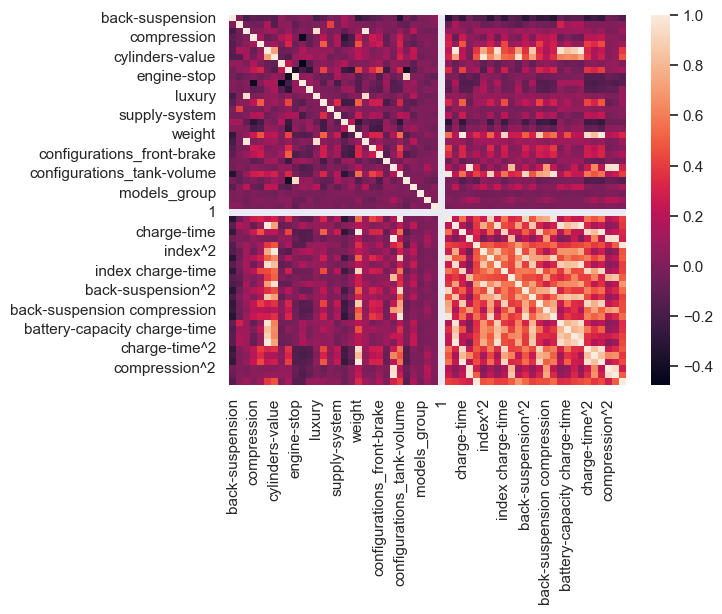

In [169]:
sns.heatmap(X.corr())

In [170]:
from sklearn.feature_selection import f_regression, SelectKBest
train_x = train_X
f_statistic, p_values = f_regression(train_X, train_y)
p_values

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
divide by zero encountered in true_divide
invalid value encountered in true_divide


array([1.50486335e-180, 4.47535221e-006, 1.15480419e-075, 3.12141999e-006,
       2.87412450e-104, 0.00000000e+000, 0.00000000e+000, 2.55138408e-003,
       5.92248110e-171, 1.57706308e-130, 5.80794503e-109, 2.57081015e-031,
       1.18517707e-047, 4.09297020e-086, 1.89108972e-007, 2.07748753e-015,
       1.58657867e-027, 6.29924001e-005, 0.00000000e+000, 3.38160435e-071,
       1.22259586e-018, 9.64419415e-235, 3.49833640e-001, 0.00000000e+000,
       0.00000000e+000, 3.63361201e-129, 2.25070899e-144, 1.64577439e-005,
       9.90600227e-082, 7.37687207e-002,             nan, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [171]:
sekector = SelectKBest(f_regression, k=20) #возврат лучших 20-ти признакаов
sekector.fit_transform(train_X, train_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
divide by zero encountered in true_divide
invalid value encountered in true_divide


array([[ 4.000000e+00,  5.500000e+01,  5.500000e+01, ...,  2.982746e+06,
         3.351400e+04,  6.646084e+06],
       [ 4.000000e+00, -1.000000e+00, -1.000000e+00, ..., -2.500000e+03,
         3.250000e+04,  6.250000e+06],
       [ 4.000000e+00,  4.500000e+01,  4.500000e+01, ...,  2.547360e+06,
         3.172000e+04,  5.953600e+06],
       ...,
       [ 4.000000e+00,  5.400000e+01,  5.400000e+01, ...,  2.882900e+06,
         3.302000e+04,  6.451600e+06],
       [ 4.000000e+00,  7.000000e+01,  7.000000e+01, ...,  3.842500e+06,
         3.445000e+04,  7.022500e+06],
       [ 4.000000e+00,  4.000000e+01,  4.000000e+01, ...,  2.260800e+06,
         3.061500e+04,  5.546025e+06]])

In [172]:
sekector.get_feature_names_out()

array(['cylinders-value', 'configurations_tank-volume', 'back-suspension',
       'index^2', 'index back-suspension', 'index charge-time',
       'index compression', 'index consumption-mixed',
       'back-suspension^2', 'back-suspension battery-capacity',
       'back-suspension charge-time', 'back-suspension compression',
       'back-suspension consumption-mixed',
       'battery-capacity compression',
       'battery-capacity consumption-mixed', 'charge-time^2',
       'charge-time compression', 'charge-time consumption-mixed',
       'compression consumption-mixed', 'consumption-mixed^2'],
      dtype=object)

In [175]:
dada = new_df[['cylinders-value', 'configurations_tank-volume',
       'back-suspension^2', 'back-suspension battery-capacity',
       'back-suspension charge-time', 'back-suspension compression',
       'back-suspension consumption-mixed',
       'battery-capacity compression',
       'battery-capacity consumption-mixed', 'charge-time^2',
       'charge-time compression', 'charge-time consumption-mixed',
       'compression consumption-mixed', 'consumption-mixed^2']]

<AxesSubplot:>

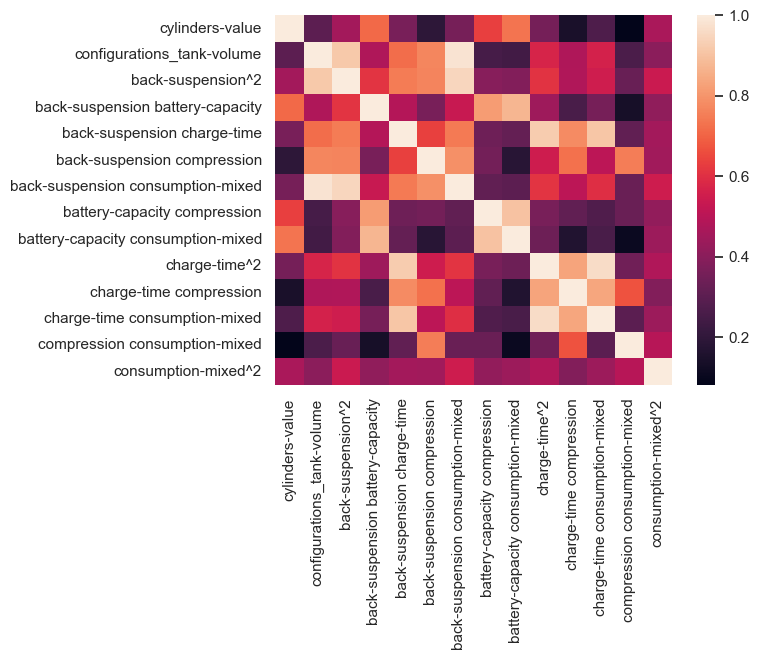

In [176]:
sns.heatmap(dada.corr())

In [178]:
X = dada
y = new_df[["target"]]

In [179]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=100)

# Baseline

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [181]:
train_X, test_X, train_y, test_y = train_test_split(X_poly, y, test_size=0.3, random_state=4)

In [182]:
reg = LinearRegression().fit(train_X, train_y)

In [183]:
reg.score(train_X, train_y)

0.53847015984886

In [184]:
mean_squared_error(reg.predict(train_X), train_y)

25649.940859076793

In [185]:
mean_squared_error(reg.predict(test_X), test_y)

26855.484208834958

In [186]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [187]:
scores

{'fit_time': array([0.04735613, 0.03126574, 0.01563334]),
 'score_time': array([0., 0., 0.]),
 'test_score': array([-25770.83281173, -25250.29432865, -26327.5932188 ])}